<a href="https://colab.research.google.com/github/LuchoValr/machine_sebastian/blob/main/cap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Unsupervised dimensionality reduction via principal component analysis

In [167]:
#Extracting the principal components step by step
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                       header=None)


In [168]:
#df_wine = df_wine.rename(columns = {1 : 'Alcohol', 2 : 'Malic acid', 3 : 'Ash',
                                    #4 : 'Alcalinity of ash', 5 : 'Magnesium', 6 : 'Total phenols',
                                    #7 : 'Flavanoids', 8 : 'Nonflavanoid phenols', 9 : 'Proanthocyanin',
                                    #10 : 'Color intensity', 11 : 'Hue', 12 : 'OD280/OD315 of diluted wines',
                                    #13 : 'Proline'})

In [169]:
column = ['Alcohol', 'Malic acid', 'Ash',
          'Alcalinity of ash', 'Magnesium', 'Total phenols',
          'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanin', 'Color intensity',
          'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [170]:
df_wine.columns = [0] + column

In [171]:
#old = df_wine.columns[1:]
#mapping = { o:n for o,n in zip(old,column) }
#df_wine.rename( columns=mapping, inplace=True )

In [172]:
#df_wine = pd.DataFrame(df_wine)
df_wine.head()

,0,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanin,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [173]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3,
                 stratify=y,
                 random_state=0)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [174]:
#Here, 𝜆𝜆 is a scalar: the eigenvalue. Since the manual computation of eigenvectors and eigenvalues is
#a somewhat tedious and elaborate task, we will use the linalg.eig function from NumPy to obtain
#the eigenpairs of the Wine covariance matrix:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


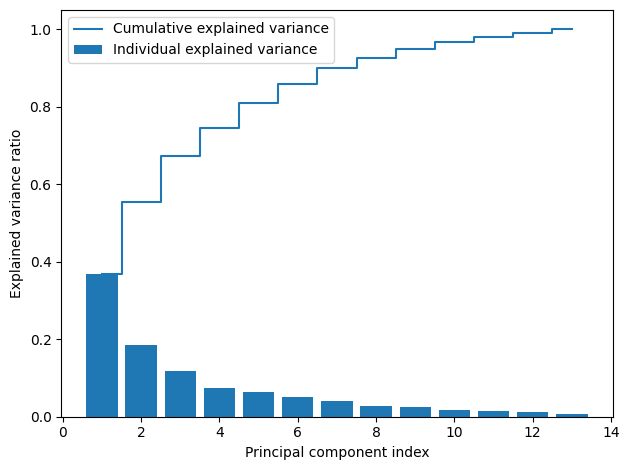

In [175]:
#Using the NumPy cumsum function, we can then calculate the cumulative sum of explained variances,
#which we will then plot via Matplotlib’s step function:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#The resulting plot indicates that the first principal component alone accounts for approximately 40
#percent of the variance.
#Also, we can see that the first two principal components combined explain almost 60 percent of the
#variance in the dataset:

In [176]:
#Or, in less technical terms, we will sort the eigenpairs by descending order of the eigenvalues,
#construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform
#the data onto the lower-dimensional subspace
#Feature transformation
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [177]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)
#By executing the preceding code, we have created a 13×2-dimensional projection matrix, W, from the
#top two eigenvectors.

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [178]:
#Using the projection matrix, we can now transform an example, x (represented as a 13-dimensional
#row vector), onto the PCA subspace (the principal components one and two) obtaining x′, now a
#two-dimensional example vector consisting of two new features:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [179]:
#Similarly, we can transform the entire 124×13-dimensional training dataset onto the two principal
#components by calculating the matrix dot product:
X_train_pca = X_train_std.dot(w)

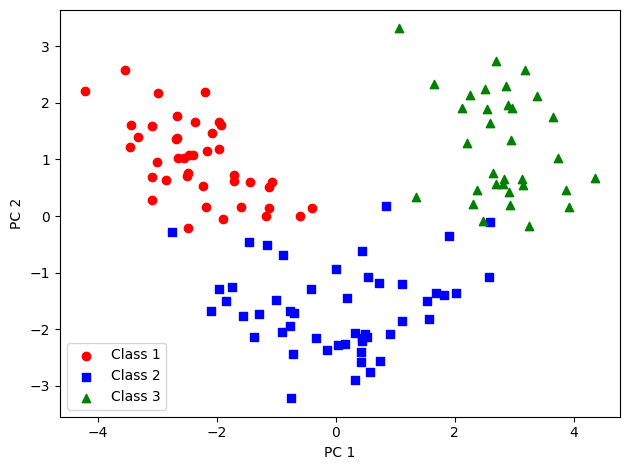

In [180]:
#Lastly, let’s visualize the transformed Wine training dataset, now stored as an 124×2-dimensional
#matrix, in a two-dimensional scatterplot:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [181]:
#As we can see in Figure 5.3, the data is more spread along the first principal component (x axis) than
#the second principal component (y axis), which is consistent with the explained variance ratio plot
#that we created in the previous subsection. However, we can tell that a linear classifier will likely be
#able to separate the classes well:

#Although we encoded the class label information for the purpose of illustration in the preceding
#scatterplot, we have to keep in mind that PCA is an unsupervised technique that doesn’t use any class
#label information.


In [182]:
from decision_boundary import plot_decision_regions

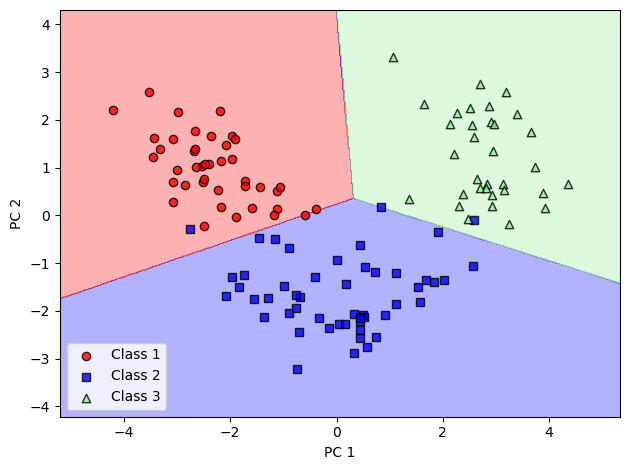

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#By executing this code, we should now see the decision regions for the training data reduced to two
#principal component axes

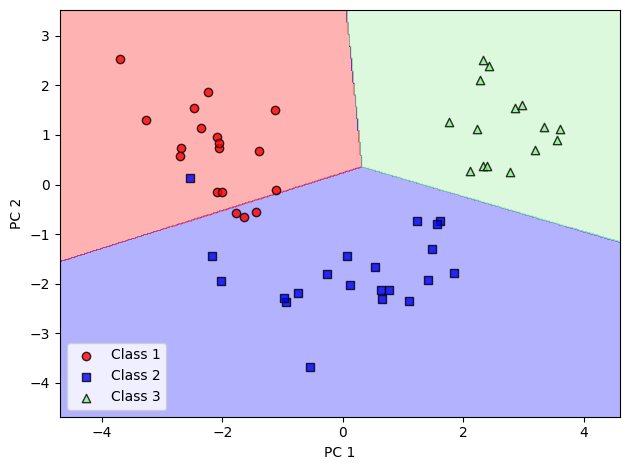

In [184]:
#For the sake of completeness,
#let’s plot the decision regions of the logistic regression on the transformed test dataset to see if it can
#separate the classes well:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#After we plot the decision regions for the test dataset by executing the preceding code, we can see
#that logistic regression performs quite well on this small two-dimensional feature subspace and only
#misclassifies a few examples in the test dataset:

In [185]:
#If we are interested in the explained variance ratios of the different principal components, we can
#simply initialize the PCA class with the n_components parameter set to None, so all principal components
#are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_
#attribute:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [186]:
#Assessing feature contributions
#First, we compute the 13×13-dimensional loadings matrix by multiplying the eigenvectors by the
#square root of the eigenvalues:
loadings = eigen_vecs * np.sqrt(eigen_vals)

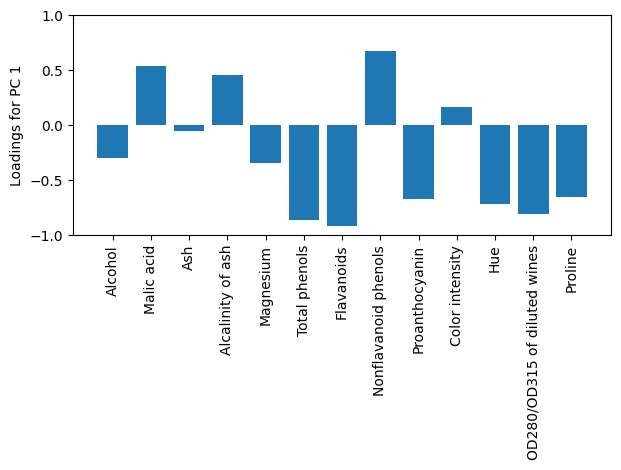

In [187]:
#Then, we plot the loadings for the first principal component,
#loadings[:, 0], which is the first column in this matrix:
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [188]:
#In the preceding code example, we compute the factor loadings for our own PCA implementation.
#We can obtain the loadings from a fitted scikit-learn PCA object in a similar manner, where pca.
#components_ represents the eigenvectors and pca.explained_variance_ represents the eigenvalues:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

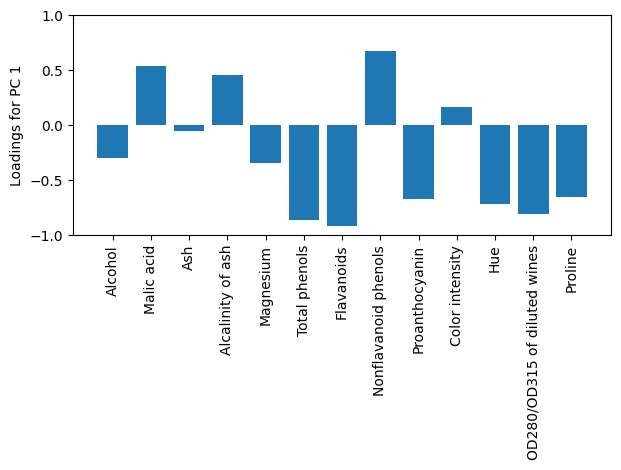

In [189]:
#To compare the scikit-learn PCA loadings with those we created previously, let us create a similar bar
#plot:
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()


##Supervised data compression via linear discriminant analysis

In [190]:
#Computing the scatter matrices
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
  print(f'MV {label}: {mean_vecs[label - 1]}\n')


MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [191]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter
print('Within-class scatter matrix: 'f'{S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


In [192]:
print('Class label distribution:',np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [194]:
#The code for computing the scaled within-class scatter matrix is as follows:
d = 13
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train==label].T)
  S_W += class_scatter
print('Scaled within-class scatter matrix: 'f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13x13


In [195]:
#we can move on to
#the next step and compute the between-class scatter matrix SB
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1) # make column vector
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: 'f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


In [197]:
#Selecting linear discriminants for the new feature subspace
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [198]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs: print(eigen_val[0])


Eigenvalues in descending order:

349.61780890599397
172.7615221897938
3.342838214841367e-14
2.842170943040401e-14
2.5545786180111422e-14
1.7533939180734234e-14
1.7533939180734234e-14
1.6579193995960903e-14
1.6579193995960903e-14
8.242524002707225e-15
8.242524002707225e-15
6.36835506006027e-15
2.974634375545734e-15


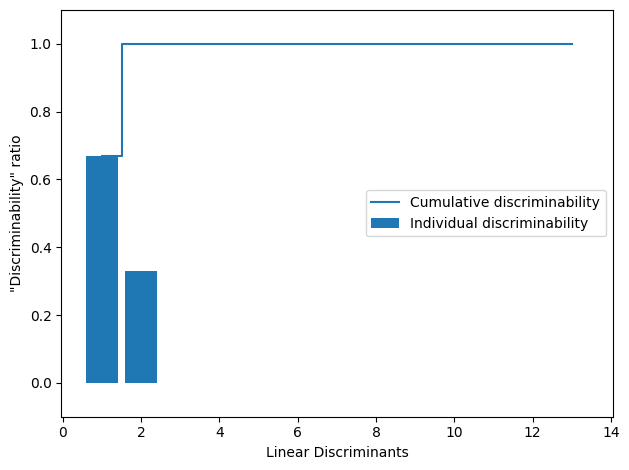

In [199]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative discriminability')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [200]:
#Let’s now stack the two most discriminative eigenvector columns to create the transformation matrix,
#W:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


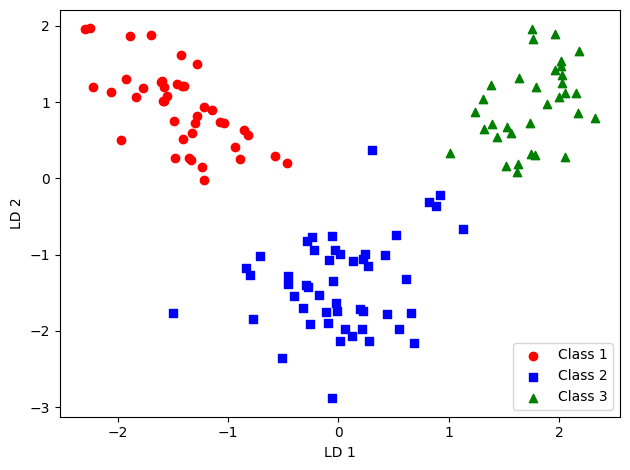

In [201]:
#Projecting examples onto the new feature space
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0],
              X_train_lda[y_train==l, 1] * (-1),
              c=c, label= f'Class {l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [202]:
#LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

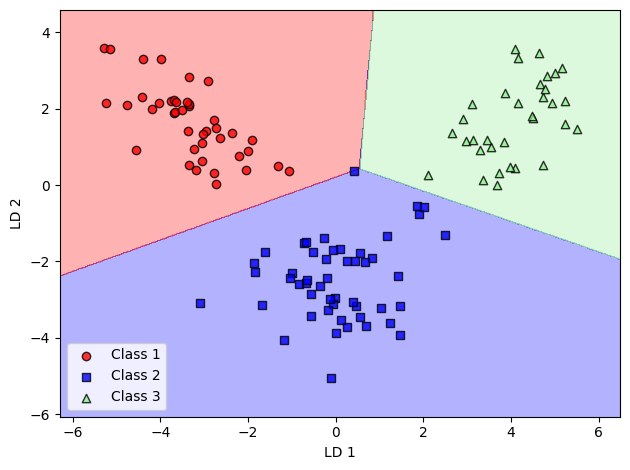

In [203]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

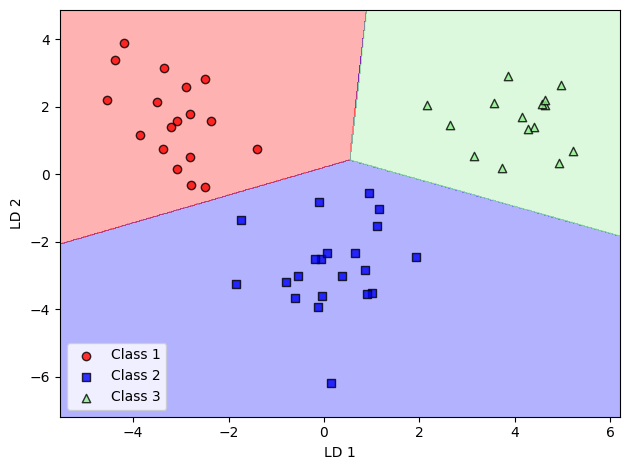

In [204]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

##Nonlinear dimensionality reduction and visualization

In [205]:
#Visualizing data via t-distributed stochastic neighbor embedding
from sklearn.datasets import load_digits
digits = load_digits()

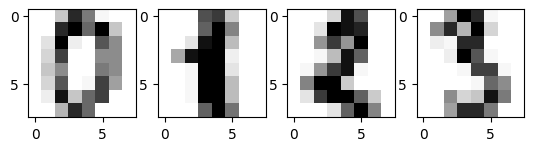

In [207]:
fig, ax = plt.subplots(1, 4)
for i in range(4):
  ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [208]:
digits.data.shape

(1797, 64)

In [209]:
y_digits = digits.target
X_digits = digits.data

In [210]:
#Then, we import the t-SNE class from scikit-learn and fit a new tsne object. Using fit_transform, we
#perform the t-SNE fitting and data transformation in one step:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

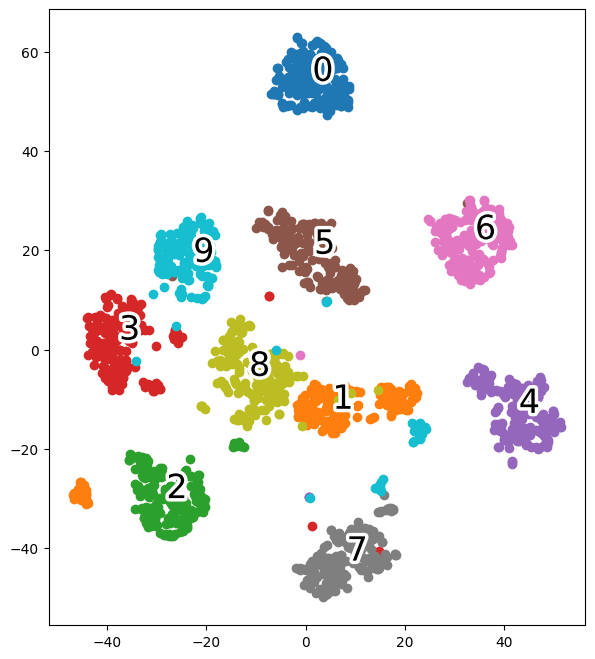

In [211]:
#Finally, let us visualize the 2D t-SNE embeddings using the following code:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
  f = plt.figure(figsize=(8, 8))
  ax = plt.subplot(aspect='equal')
  for i in range(10):
    plt.scatter(x[colors == i, 0], x[colors == i, 1])
  for i in range(10):
     xtext, ytext = np.median(x[colors == i, :], axis=0)
     txt = ax.text(xtext, ytext, str(i), fontsize=24)
     txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),
                           PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()
#As we can see, t-SNE is able to separate the different digits (classes) nicely, although not perfectly. It
#might be possible to achieve better separation by tuning the hyperparameters. However, a certain
#degree of class mixing might be unavoidable due to illegible handwriting. For instance, by inspecting
#individual images, we might find that certain instances of the number 3 indeed look like the number
#9, and so forth